# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [2]:
# third party
import numpy as np
import matplotlib.pyplot as plt
import time

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [3]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore your tasks are as follows:
  - (2) Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - (2) Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - (2) Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.

In [4]:
delta_hist =[]
DEBUG = True

def log(*args, **kwargs):
    """
    Debug log
    if debug is enabled you can log the step details
    
    Args:
        args: List of item for the print command when activated
    """
    if DEBUG:
        print(*args, **kwargs)

def feed_forward(X, weights):
    """
    Feed forward
    puts the X values into the forward calculation
    to calculate the current out come with the given weights
    
    Args: 
        X: training data
        weights: for the certain step 
                (no difference in a FC network)

    returns: 
        an array with each calculated outcome
    """
    a = [X]
    for w in weights:
        a.append(
            np.maximum(
                a[-1].dot(w),
                0
            )
        )
    return a

def grads(X, Y, weights, iteration):
    """
    Gradinent function
    
    To forward and then backward calucate the new grads
    for updating the weights appropriately.
    
    Args:
        X: Training data
        Y: Test Data 
        weights: old weights based on the old calculations
        
    Returns:
        new grads for updating the old weights
    """
    grads = np.empty_like(weights)
    a = feed_forward(X, weights)
    
    return backwardsFunction(X, Y, weights, a, grads, iteration)
    
def backwardsFunction(X, Y, weights, a, grads, iteration):
    # delta für alle labels 
    delta = a[-1] - Y
    
    # berechnen der Lossfunktion
    delta_hist.append(np.sum(delta*Y)/len(X))
    
    #erster step des backward paths berechnen
    grads[-1] = a[-2].T.dot(delta)
    
    # über die anderen layer loopen und
    # die einzelnen Backward ergebnisse ergänzen
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X)

# initialiseren der einzelnen Training- und Testdaten
trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
# Initialisieren der einzelnen Weights
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]
# einige superparamter für das Netzwerk
num_epochs, batch_size, learn_rate = 20, 50, 0.1


# loop über die anzahlen der Epochen => 20
for i in range(num_epochs):
    log("Episode: " , i)
    for j in range(0, len(trX), batch_size):
        # Training daten in Batches unterteilen
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        # lernen der weights basierend auf den test daten (batch)
        weights -= learn_rate * grads(X, Y, weights, i)
    
    # testen der tatsächlichen Genauigkeit
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    # vergleichen der eigentlichen Ergebnissen mit den berechneten Ergebnisse
    # Ausgabe der Genauigkeit
    log ("Error: ", 1 - np.mean(prediction_test == np.argmax(teY, axis=1)))
    log ("Correct: ",np.mean(prediction_test == np.argmax(teY, axis=1)))
    

Episode:  0
Error:  0.058599999999999985
Correct:  0.9414
Episode:  1
Error:  0.04800000000000004
Correct:  0.952
Episode:  2
Error:  0.04139999999999999
Correct:  0.9586
Episode:  3
Error:  0.038799999999999946
Correct:  0.9612
Episode:  4
Error:  0.03720000000000001
Correct:  0.9628
Episode:  5
Error:  0.03510000000000002
Correct:  0.9649
Episode:  6
Error:  0.033399999999999985
Correct:  0.9666
Episode:  7
Error:  0.031000000000000028
Correct:  0.969
Episode:  8
Error:  0.02949999999999997
Correct:  0.9705
Episode:  9
Error:  0.028000000000000025
Correct:  0.972
Episode:  10
Error:  0.027599999999999958
Correct:  0.9724
Episode:  11
Error:  0.026699999999999946
Correct:  0.9733
Episode:  12
Error:  0.02629999999999999
Correct:  0.9737
Episode:  13
Error:  0.025699999999999945
Correct:  0.9743
Episode:  14
Error:  0.025000000000000022
Correct:  0.975
Episode:  15
Error:  0.0242
Correct:  0.9758
Episode:  16
Error:  0.023800000000000043
Correct:  0.9762
Episode:  17
Error:  0.02349999

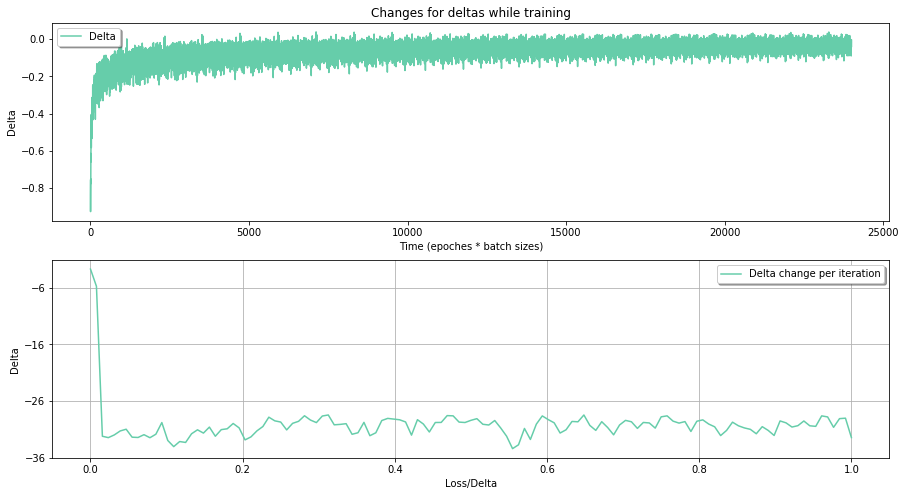

In [5]:
fig1 = plt.figure(1, figsize=(15, 8))
ax1 = fig1.add_subplot(211)

# Plot of the decay model 
ax1.plot(delta_hist, color='mediumaquamarine', label="Delta")

ax1.set_xlabel('Time (epoches * batch sizes)')
ax1.set_ylabel('Delta')
ax1.set_title('Changes for deltas while training')

# Allows me to change scales
# ax1.set_yscale('log')
ax1.legend(fancybox=True, shadow=True)

ax2 = fig1.add_subplot(212)

# Plot of the decay model 
ax2.psd(delta_hist, color='mediumaquamarine', label="Delta change per iteration")

ax2.set_xlabel('Loss/Delta')
ax2.set_ylabel('Delta')


# Allows me to change scales
# ax1.set_yscale('log')
ax2.legend(fancybox=True, shadow=True)

## Todo: Comprehension
Hopefully, this implementation of a neural network is clear now. As a check answer the following questions (a few sentences, no novels):

  - (2) Which cost function is used, what is its derivation and how is it implemented?
  
      * cost function = loss function => $\dfrac{\sum_{i=0}^{N}{delta_i*Y_i}}{\lvert X \lvert}$
      
      
  - (2) Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
  
      * The delta is between -1 and zero due to the fact that we calculated the delta be removing the correct
        labels from the current evaluated labels. Thus we have to be below zero as Zero would be 100% fitting. 
  
  
  - (2) How does the network implement the backpropagation algorithm?
  
      *  It staticly implements it by checking the input to be `x == 0` or to be `x > 0`,
         so that in the backward path only the maximum paths are being tracked.

## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of exercise 03. 

(5) Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

Episode:  0
Correct:  0.8679
Episode:  1
Correct:  0.8979
Episode:  2
Correct:  0.9106
Episode:  3
Correct:  0.9202
Episode:  4
Correct:  0.9271
Episode:  5
Correct:  0.9309
Episode:  6
Correct:  0.9355
Episode:  7
Correct:  0.9386
Episode:  8
Correct:  0.9414
Episode:  9
Correct:  0.944
Episode:  10
Correct:  0.9467
Episode:  11
Correct:  0.9477
Episode:  12
Correct:  0.9496
Episode:  13
Correct:  0.9509
Episode:  14
Correct:  0.9522
Episode:  15
Correct:  0.9537
Episode:  16
Correct:  0.9545
Episode:  17
Correct:  0.9553
Episode:  18
Correct:  0.9559
Episode:  19
Correct:  0.9568


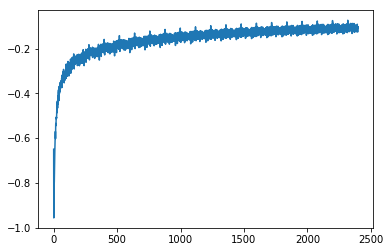

In [6]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        # Initialisieren der einzelnen Weights
        self.layersWeights = [np.random.randn(*l) * 0.1 for l in layers]
        # delta history
        self.delta_hist = []
        
    def forward(self, data):
        self.forwardLayers = [data]
        
        # f(x) = max(Wx, 0)
        # for each layer so we have a stacked max function
        for w in self.layersWeights:
            self.forwardLayers.append(
                np.maximum(
                    self.forwardLayers[-1].dot(w),
                    0
                )
            )
        
        assert(len(self.forwardLayers) == len(self.layersWeights)+1)
        
        return self.forwardLayers
            

    def backward(self, X, Y):
        """
        # delta für alle labels 
        delta = a[-1] - Y

        delta_hist.append(np.sum(delta*Y)/len(X))
        grads[-1] = a[-2].T.dot(delta)

        for i in range(len(a)-2, 0, -1):
            delta = (a[i] > 0) * delta.dot(weights[i].T)
            grads[i-1] = a[i-1].T.dot(delta)
        return grads / len(X)
        """
        # create gradient mapping based on the layer structure
        self.gradients = np.empty_like(self.layersWeights)
        
        # Check the output layer against the accepted labels 
        delta = self.forwardLayers[-1] - Y
    
        self.delta_hist.append(np.sum(delta*Y) / len(X))
        
        # first backward gradient
        self.gradients[-1] = self.forwardLayers[-2].T.dot(delta)

        # loop through each layer backwards
        for i in range(len(self.forwardLayers)-2, 0, -1):
            delta = (self.forwardLayers[i] > 0) * delta.dot(self.layersWeights[i].T)
            self.gradients[i-1] = self.forwardLayers[i-1].T.dot(delta)
            
        return self.gradients / len(X)

    def predict(self, data):
        return self.forward(data)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        self.network = network
        self.trX, self.trY = train_data, train_labels
        self.teX, self.teY = test_data, test_labels
        self.num_epochs, self.batch_size, self.learn_rate = epochs, batch_size, learning_rate
        
        # loop über die anzahlen der Epochen => 20
        for i in range(self.num_epochs):
            log("Episode: " , i)
            self.stochastic_gradient_descent()
            if self.teX is not None: 
                prediction_test = np.argmax(self.network.predict(self.teX)[-1], axis=1)
                log ("Correct: ",np.mean(prediction_test == np.argmax(self.teY, axis=1)))
        
    def stochastic_gradient_descent(self):
        for j in range(0, len(self.trX), self.batch_size):
            # Training daten in Batches unterteilen
            batchX, batchY = self.trX[j:j+self.batch_size], self.trY[j:j+self.batch_size]
            
            self.network.forward(batchX)
            gradient = self.network.backward(batchX, batchY)
            
            # lernen der weights basierend auf den test daten (batch)
            self.network.layersWeights -= self.learn_rate * gradient
         

 # Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 20, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate)
plt.plot(mnist_NN.delta_hist)